# EDA

## Marta ---------------------------------------------------------

put all of your code between here and the next person's name only

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
noaa_data = pd.read_csv('data/noaa_data_clean.csv', index_col= False)

In [3]:
noaa_data.columns

Index(['statecode', 'division', 'yearmonth', 'pcp', 'tavg', 'pdsi', 'phdi',
       'zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
       'sp12', 'sp24', 'tmin', 'tmax', 'state', 'month', 'year'],
      dtype='object')

In [4]:
noaa_data.describe()

,statecode,division,yearmonth,pcp,tavg,pdsi,phdi,zndx,pmdi,cdd,...,sp02,sp03,sp06,sp09,sp12,sp24,tmin,tmax,month,year
count,11486.000000,11486.0,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,...,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000,11486.000000
mean,32.375588,0.0,196038.881073,1.922654,51.755916,-0.038869,-0.007610,-0.012021,-0.003684,72.534477,...,0.002698,0.002158,0.001066,0.001036,0.001011,-0.001191,38.808182,64.695544,6.493819,1960.323873
std,32.988899,0.0,3454.063765,1.721008,14.638455,2.585360,2.705266,1.924128,2.563077,131.479806,...,0.994348,0.997144,0.998099,0.999261,1.000486,1.003913,13.323738,16.299261,3.450642,34.540727
min,2.000000,0.0,190101.000000,0.000000,12.700000,-9.090000,-9.090000,-7.140000,-9.090000,0.000000,...,-3.090000,-3.090000,-3.090000,-3.090000,-3.090000,-3.090000,-0.800000,20.600000,1.000000,1901.000000
25%,4.000000,0.0,193011.250000,0.682500,39.800000,-1.860000,-2.040000,-1.360000,-1.780000,0.000000,...,-0.660000,-0.680000,-0.670000,-0.670000,-0.660000,-0.670000,28.400000,51.600000,3.000000,1930.000000
50%,29.000000,0.0,196010.000000,1.530000,51.600000,-0.250000,-0.560000,-0.170000,-0.080000,6.500000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,38.200000,64.800000,6.000000,1960.000000
75%,45.000000,0.0,199009.000000,2.610000,64.200000,1.680000,1.960000,1.120000,1.680000,84.000000,...,0.670000,0.660000,0.670000,0.670000,0.680000,0.660000,49.600000,78.800000,9.000000,1990.000000
max,110.000000,0.0,202010.000000,16.610000,84.100000,12.510000,12.510000,10.030000,12.510000,788.000000,...,3.090000,3.090000,3.090000,3.090000,3.090000,3.090000,68.800000,99.300000,12.000000,2020.000000


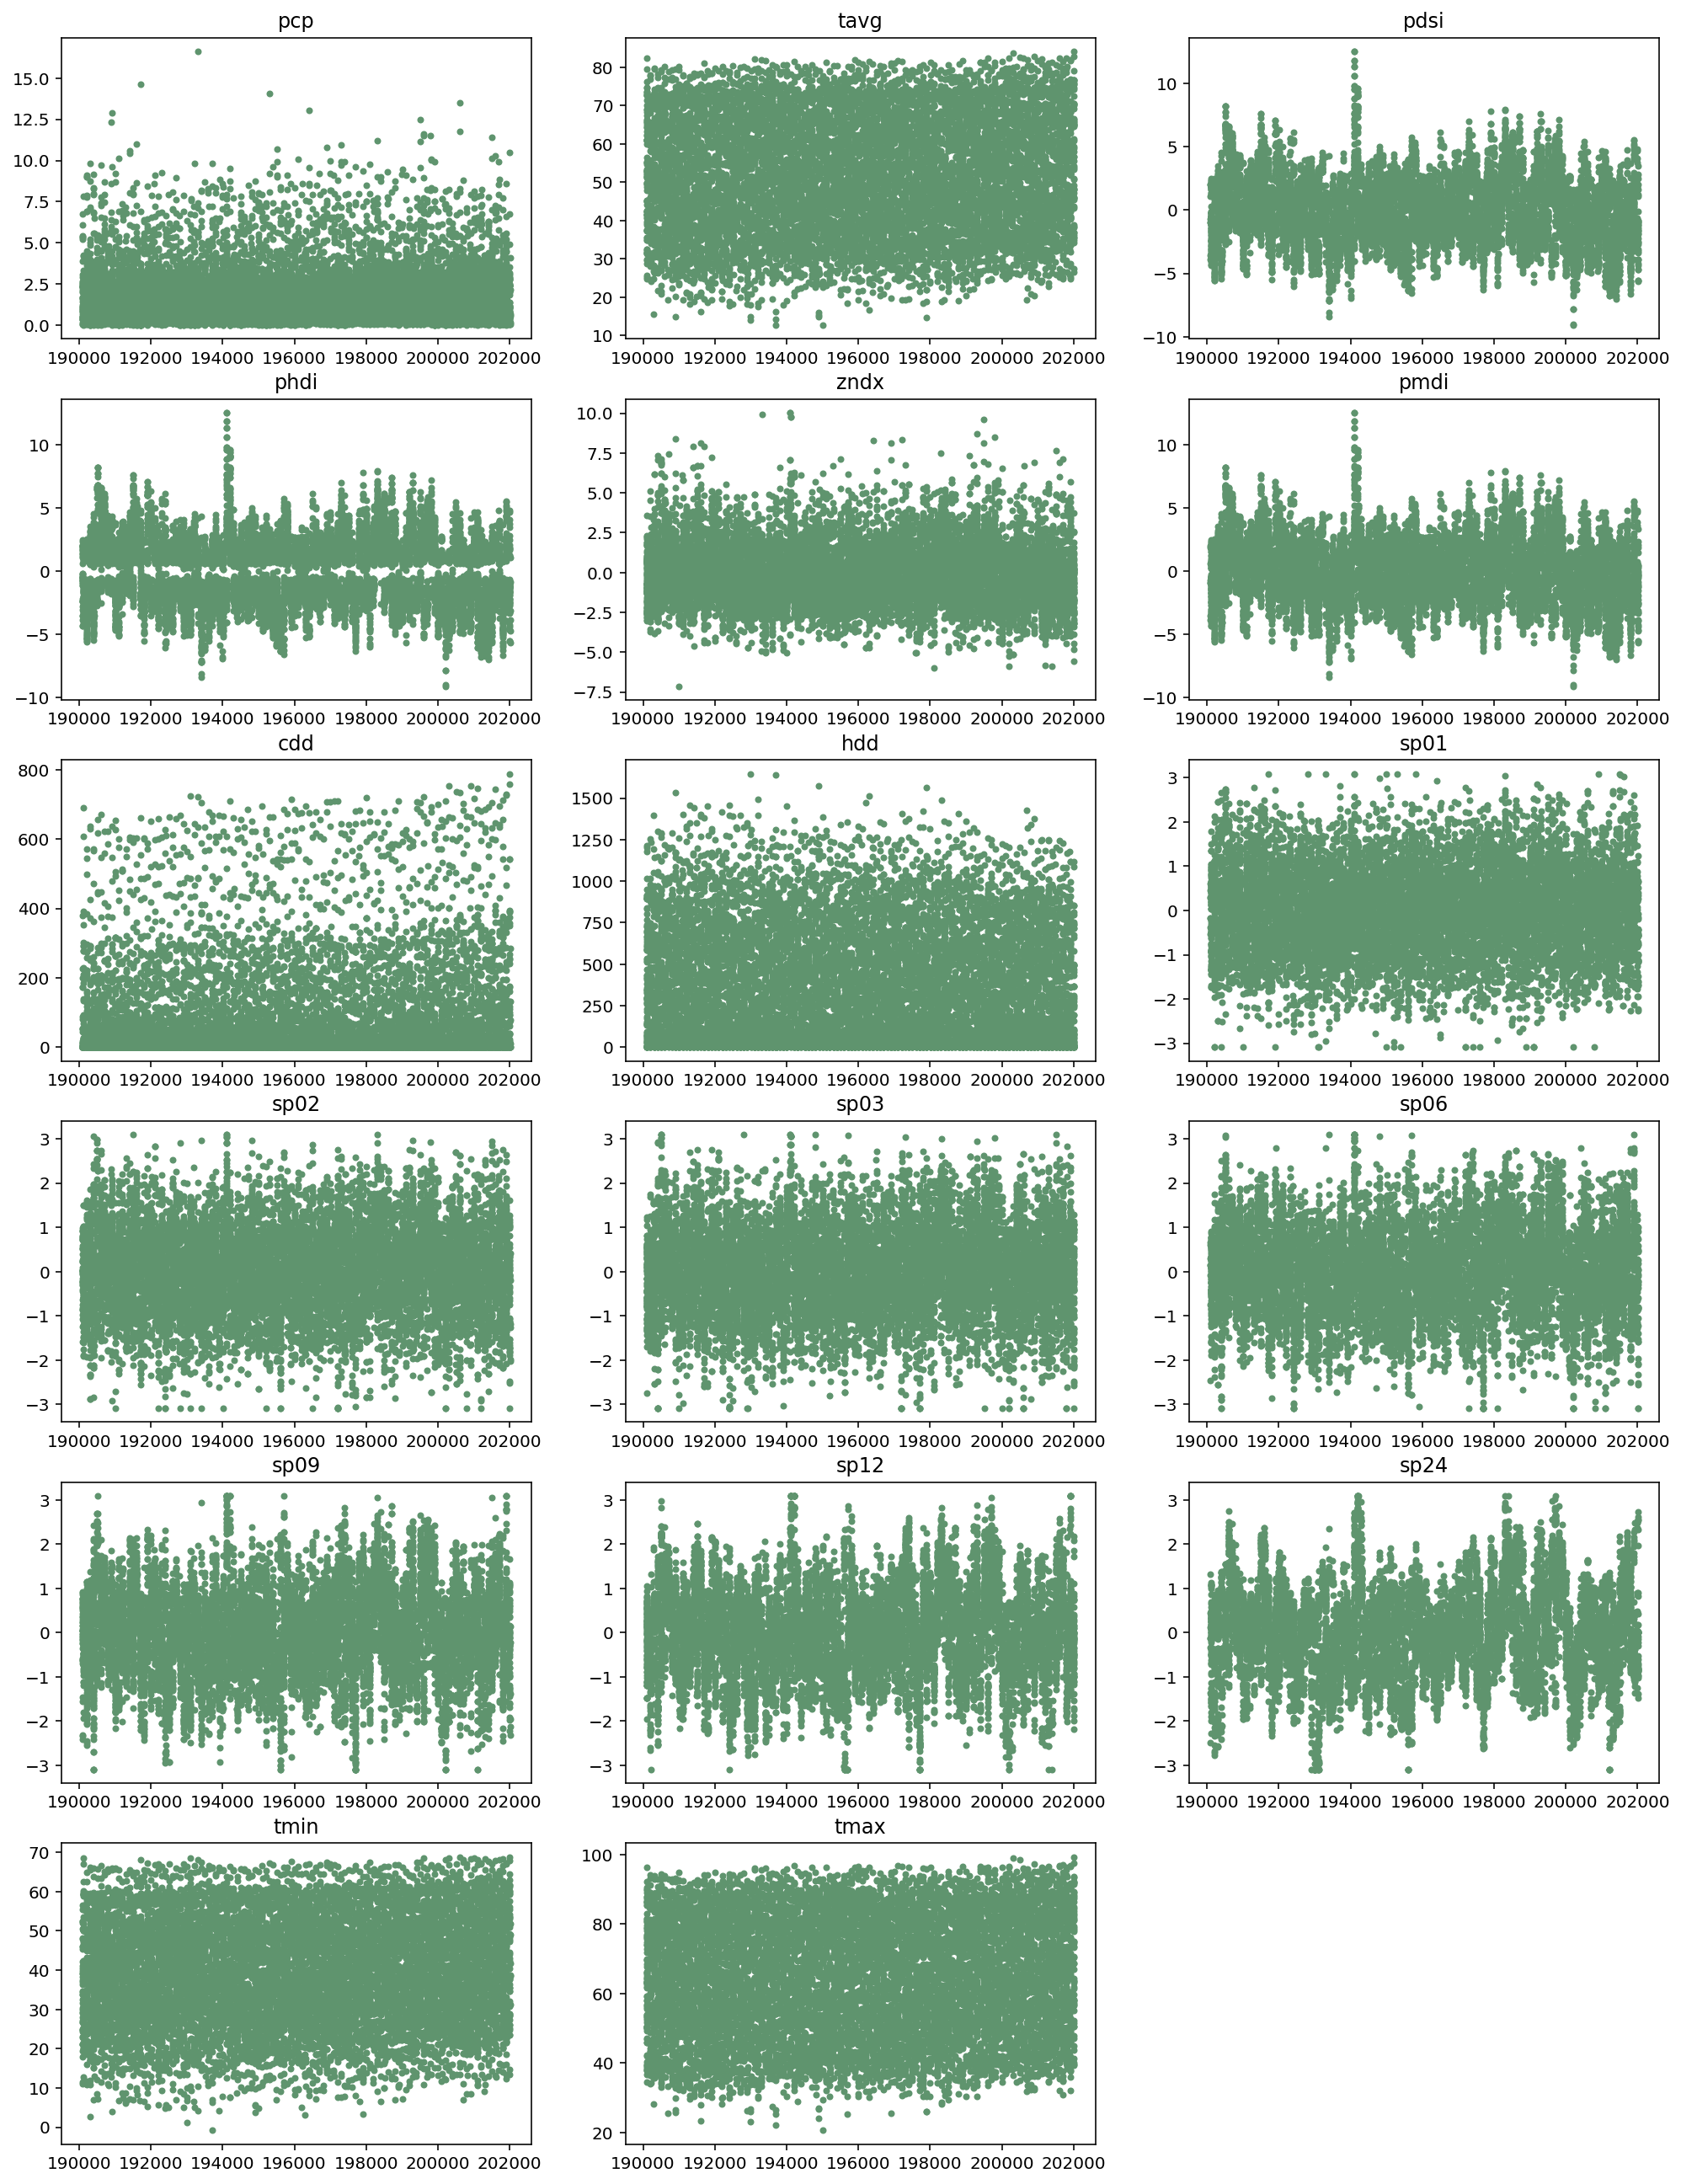

In [5]:
climate_cols = ['pcp', 'tavg', 'pdsi', 'phdi','zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
               'sp12', 'sp24', 'tmin', 'tmax']

plt.figure(figsize=(17,23))
for i in range(len(climate_cols)):
    plt.subplot(6,3,i+1)
    plt.scatter(noaa_data['yearmonth'], noaa_data[climate_cols[i]], color = '#5f946e', marker = '.')
    plt.title(f"{climate_cols[i]}")
    
plt.savefig('./visuals/climate_scatters.png')

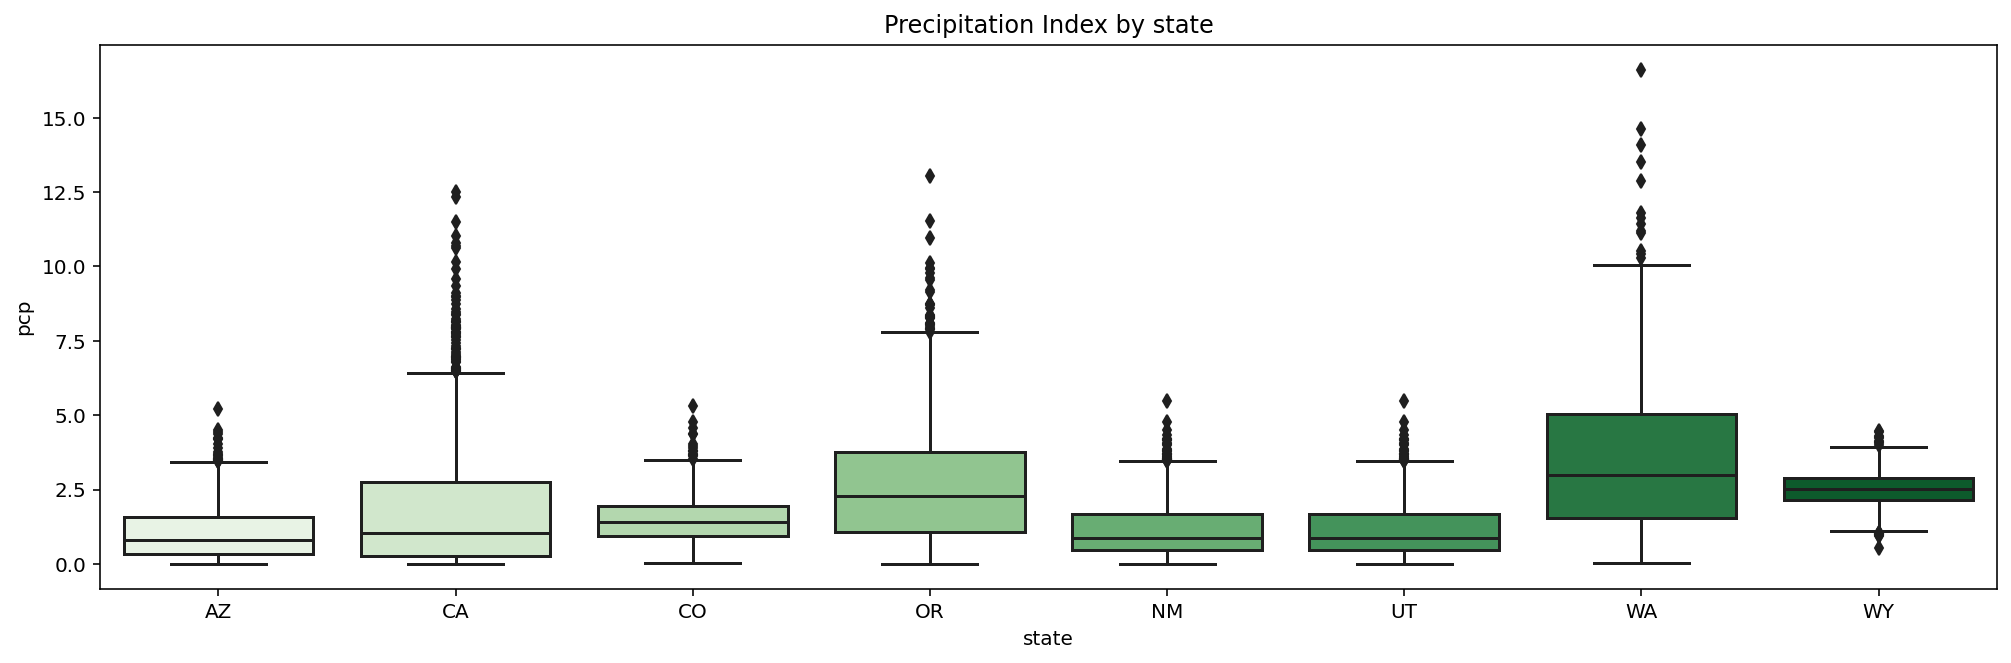

In [6]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'pcp', palette= 'Greens')
plt.title('Precipitation Index by state');
plt.savefig('./visuals/pcp_by_state.png')

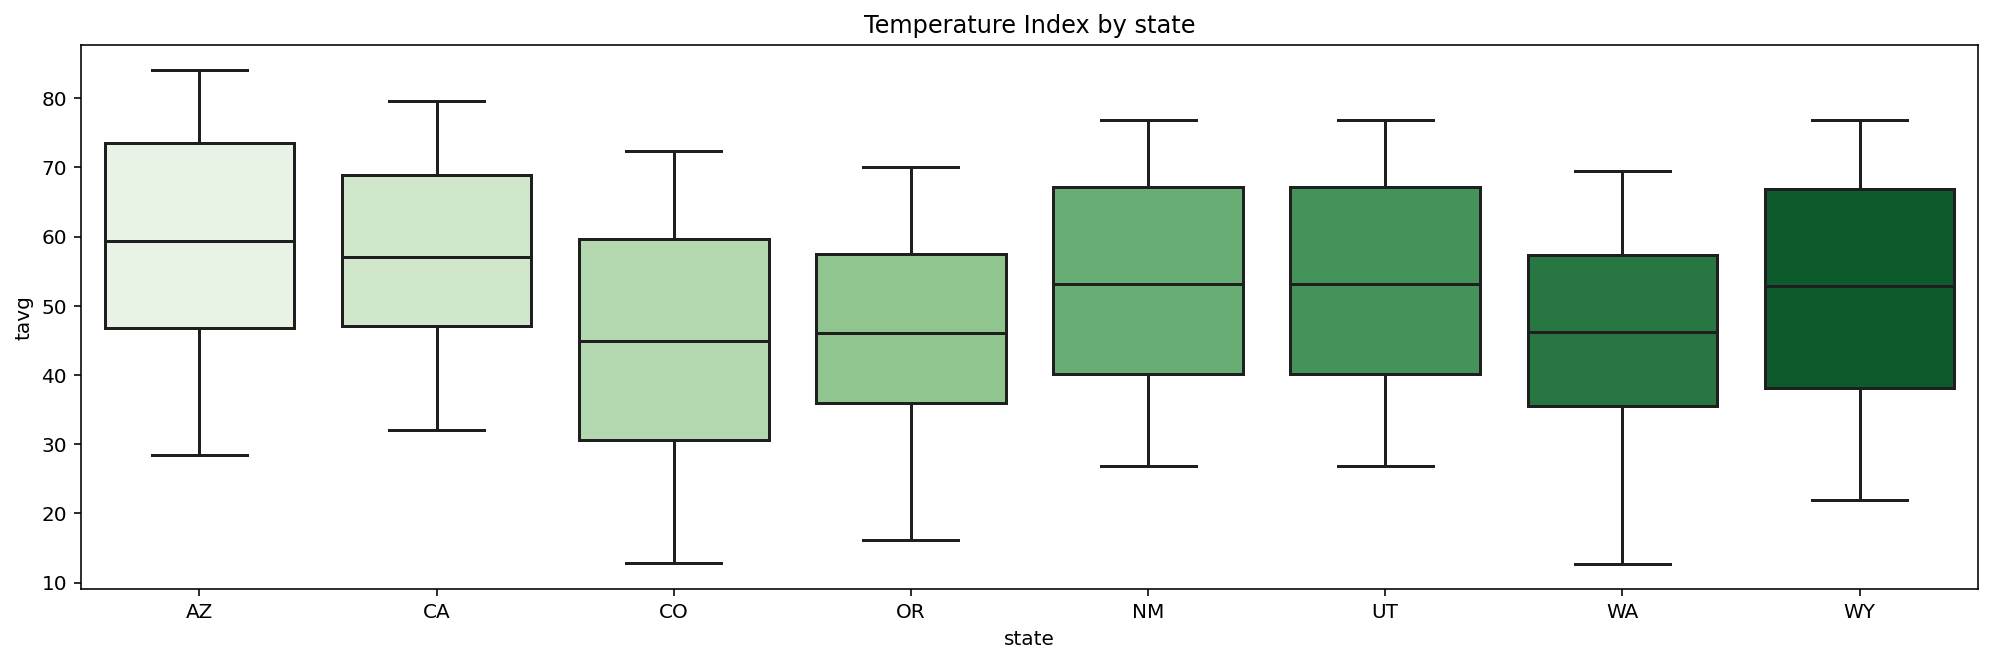

In [7]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'tavg', palette= 'Greens')
plt.title('Temperature Index by state');
plt.savefig('./visuals/tavg_by_state.png')

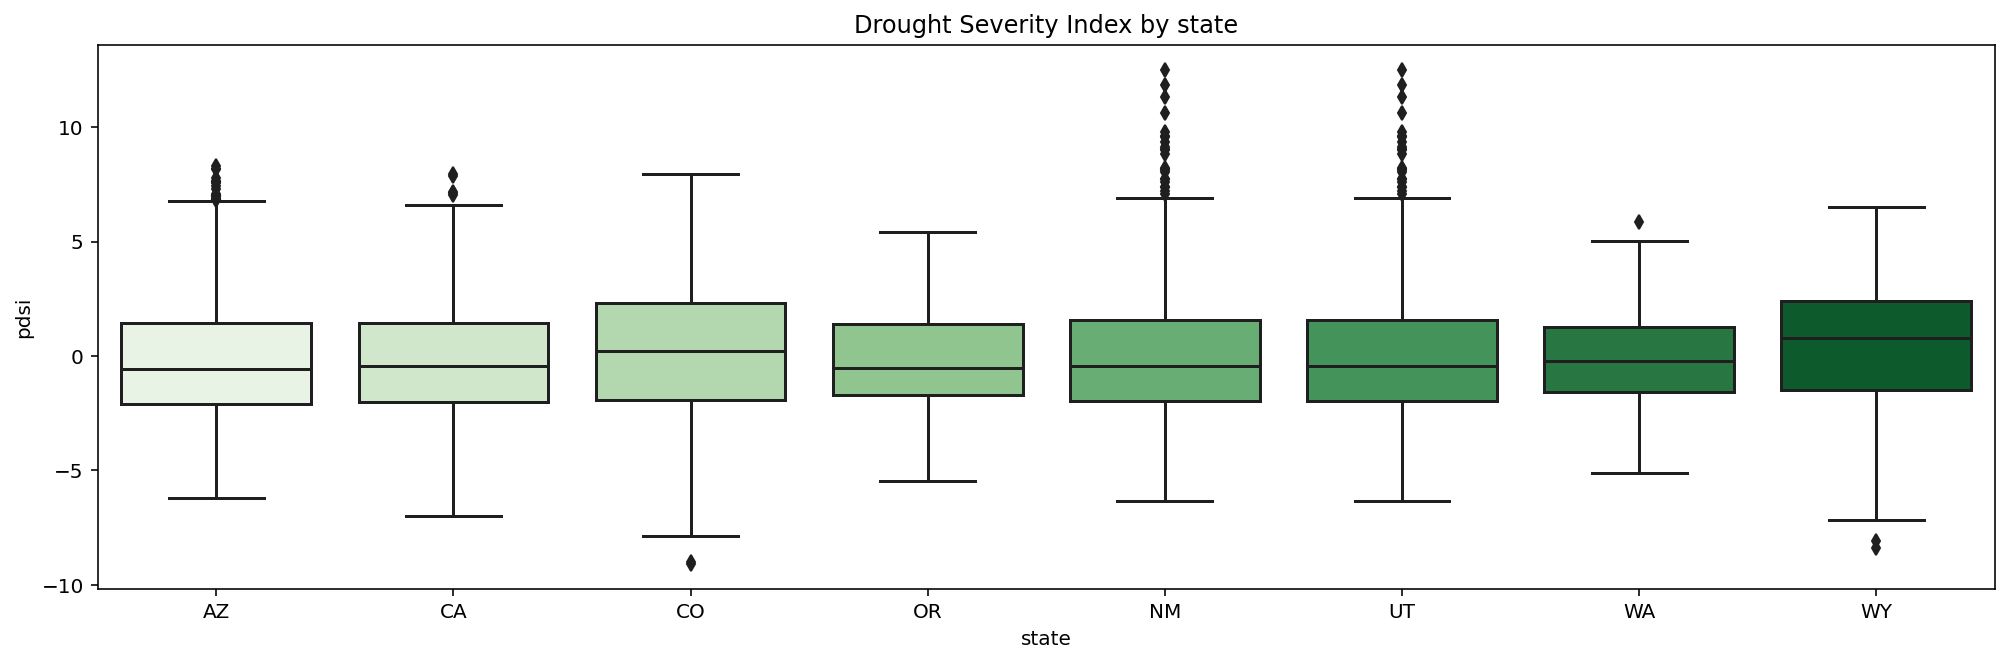

In [8]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'pdsi', palette= 'Greens')
plt.title('Drought Severity Index by state');
plt.savefig('./visuals/pdsi_by_state.png')

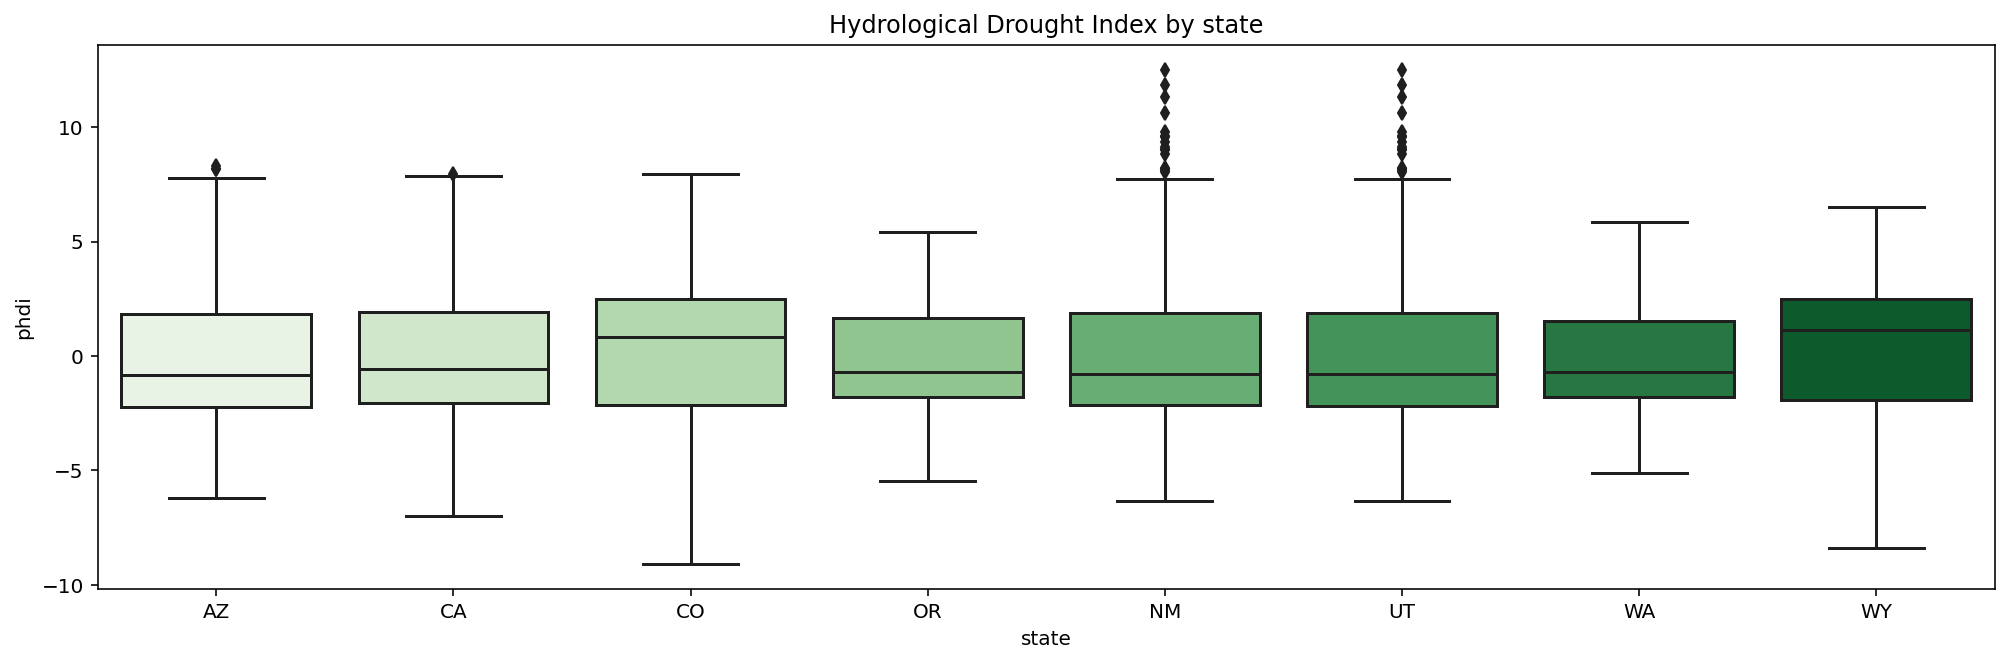

In [9]:
plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'phdi', palette= 'Greens')
plt.title('Hydrological Drought Index by state');
plt.savefig('./visuals/phdi_by_state.png')

In [10]:
tmax_yr = noaa_data.groupby('year')['tmax'].mean().to_dict()
noaa_data['avg_yr_tmax'] = noaa_data['year'].apply(lambda x: tmax_yr[x])

tmin_yr = noaa_data.groupby('year')['tmin'].mean().to_dict()
noaa_data['avg_yr_tmin'] = noaa_data['year'].apply(lambda x: tmin_yr[x])

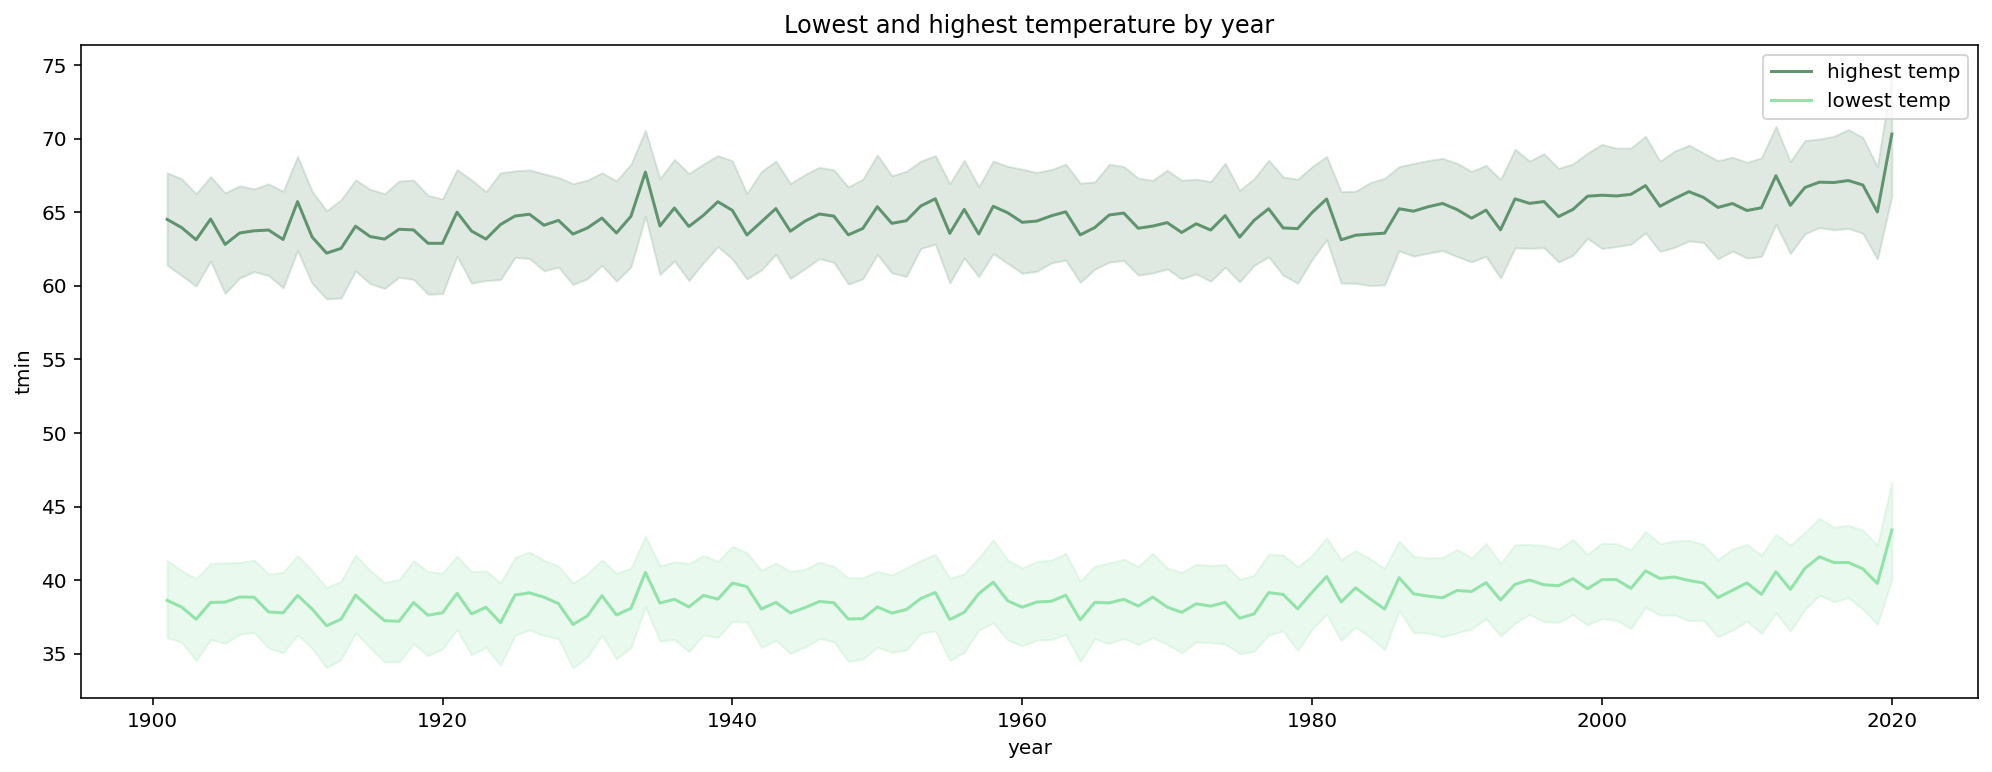

In [14]:
plt.figure(figsize = (17,6))
sns.lineplot(data = noaa_data, x = 'year', y = 'tmax', color = '#5f946e', label = 'highest temp')
sns.lineplot(data = noaa_data, x = 'year', y = 'tmin', color = '#92e3a9', label = 'lowest temp')
plt.title('Lowest and highest temperature by year')
plt.legend();
plt.savefig('min_max_tmp_yr.png')

In [12]:
noaa_data.tail()

,statecode,division,yearmonth,pcp,tavg,pdsi,phdi,zndx,pmdi,cdd,...,sp09,sp12,sp24,tmin,tmax,state,month,year,avg_yr_tmax,avg_yr_tmin
11481,110,0,202006,2.74,70.29,2.81,2.81,-0.88,2.32,242,...,0.94,0.83,2.56,57.51,83.05,WY,6,2020,70.319194,43.41629
11482,110,0,202007,2.94,75.65,2.47,2.47,-0.15,1.87,395,...,0.53,0.89,2.73,62.89,88.39,WY,7,2020,70.319194,43.41629
11483,110,0,202008,2.41,74.70,1.65,1.65,-1.69,0.38,351,...,0.61,0.75,2.54,61.54,87.84,WY,8,2020,70.319194,43.41629
11484,110,0,202009,2.40,65.97,1.24,1.24,-0.73,-0.28,176,...,0.49,0.73,2.32,53.01,78.89,WY,9,2020,70.319194,43.41629
11485,110,0,202010,2.16,54.36,1.09,1.09,-0.06,-0.39,79,...,0.14,0.29,1.96,41.65,67.06,WY,10,2020,70.319194,43.41629


## Jesse ---------------------------------------------------------

put all of your code between here and the next person's name only

In [ ]:
import sqlite3
import pandas as pd
from urllib.request import urlopen
import json
import pandas as pd
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [ ]:
fire_map = pd.read_pickle('./data/fire_pickle.pkl')

In [ ]:
states_of_interest = ['CA','WA','OR','NV','AZ','NM','UT', 'CO', 'WY', 'ID', 'MT']

fire_map = fire_map[fire_map['STATE'].isin(states_of_interest)]

fire_map['STATE']=fire_map['STATE'].replace({'CA': '06', 
                       'WA': '53',
                      'OR': '41',
                      'NV': '32',
                      'AZ': '04',
                      'NM': '35',
                      'UT': '49',
                      'CO': '08',
                      'WY': '56',
                      'ID': '16',
                      'MT': '30',
                      })

fire_map['combined_fips'] =  fire_map['STATE'] + fire_map['FIPS_CODE']

In [ ]:
wildfire = fire_map.groupby(['combined_fips']).agg({'FIRE_SIZE': ['count']})

wildfire['FIPS_CODE'] = wildfire.index

wildfire.columns = ["FIPS_CODE", "FIRE_SIZE"]

wildfire.reset_index()

In [ ]:
wildfire_map = wildfire[['FIPS_CODE', 'count']]


fig = px.choropleth(wildfire_map, 
                    geojson=counties,
                    locations='FIPS_CODE',
                    color='count',
                           color_continuous_scale="Viridis",
                           range_color=(100, 6000),
                           scope="usa",
                           labels={'FIRE_SIZE':'FIRE_COUNT'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## CM ---------------------------------------------------------

put all of your code between here and the next person's name only

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fire_df = pd.read_pickle('./data/fire_pickle.pkl')

In [4]:
fire_df

,FIRE_CODE,FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,BJ8K,FOUNTAIN,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,CA,63,063,Plumas
1,AAC0,PIGEON,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,CA,61,061,Placer
2,A32W,SLACK,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,CA,17,017,El Dorado
3,None,DEER,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,CA,3,003,Alpine
4,None,STEVENOT,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,CA,3,003,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,None,ODESSA 2,None,2015,2457291.5,269,1726,13.0,Missing/Undefined,2457291.5,269.0,1843,0.01,A,40.481637,-122.389375,CA,None,None,None
1880461,None,None,None,2015,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.20,A,37.617619,-120.938570,CA,None,None,None
1880462,None,None,None,2015,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.10,A,37.617619,-120.938570,CA,None,None,None
1880463,None,None,None,2015,2457309.5,287,2309,13.0,Missing/Undefined,NaN,NaN,None,2.00,B,37.672235,-120.898356,CA,None,None,None


In [5]:
fire_df.isnull().sum()

FIRE_CODE           300047
FIRE_NAME            64196
COMPLEX_NAME        514477
FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
DISCOVERY_TIME      138738
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE           138864
CONT_DOY            138864
CONT_TIME           164573
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
STATE                    0
COUNTY              285678
FIPS_CODE           285678
FIPS_NAME           285678
dtype: int64

In [6]:
# fire name NA for nulls
# fire code null to NONE
# DISCOVERY TIME : DROP
# CONT_DATE placeholder for nulls like 999999 
# Math it out subtract containment date from discovery date for tot_time_burn
# drop county and fibs name and Discovery_DOY and CONT DOY. 
# set all nulls in fibs_code to None

#make all columns lower_case. 

In [7]:
fire_df['FIPS_CODE'].unique()

array(['063', '061', '017', '003', '005', None, '027', '069', '037',
       '053', '089', '049', '009', '023', '043', '051', '039', '021',
       '025', '013', '031', '047', '510', '007', '057', '001', '011',
       '091', '081', '019', '015', '035', '006', '087', '065', '033',
       '029', '095', '075', '059', '055', '077', '093', '085', '045',
       '041', '079', '028', '115', '107', '067', '097', '105', '083',
       '071', '073', '109', '111', '099', '103', '012', '113', '101'],
      dtype=object)

In [8]:
fire_df['FIRE_NAME'].fillna('NO_NAME', inplace=True)
fire_df['COMPLEX_NAME'].fillna('NO_NAME', inplace=True)
fire_df['FIRE_CODE'].fillna('NA', inplace=True)
fire_df['FIPS_CODE'].fillna('0', inplace=True)
# fire_df['CONT_DATE'].fillna('0', inplace=True)

droplist = ['CONT_DOY','CONT_TIME', 'COUNTY', 'FIPS_NAME', 'DISCOVERY_DOY', 'DISCOVERY_TIME']
fire_df.drop(droplist, axis = 1, inplace=True)

fire_df['FIPS_CODE'].unique()

array(['063', '061', '017', '003', '005', '0', '027', '069', '037', '053',
       '089', '049', '009', '023', '043', '051', '039', '021', '025',
       '013', '031', '047', '510', '007', '057', '001', '011', '091',
       '081', '019', '015', '035', '006', '087', '065', '033', '029',
       '095', '075', '059', '055', '077', '093', '085', '045', '041',
       '079', '028', '115', '107', '067', '097', '105', '083', '071',
       '073', '109', '111', '099', '103', '012', '113', '101'],
      dtype=object)

In [9]:

fire_df['CONT_DATE'] = fire_df['CONT_DATE'].astype(float)

epoch = pd.to_datetime(0, unit='s').to_julian_date()
fire_df['CONT_DATE_FIXED'] = pd.to_datetime(fire_df['CONT_DATE'] - epoch, unit='D')
fire_df['DISC_DATE_FIXED'] = pd.to_datetime(fire_df['DISCOVERY_DATE'] - epoch, unit='D')

fire_df['TIME_BURNT_FIXED'] = fire_df['CONT_DATE_FIXED'] - fire_df['DISC_DATE_FIXED']

fire_df['TIME_BURNT'] = fire_df['CONT_DATE'] - fire_df['DISCOVERY_DATE']


## Kira ---------------------------------------------------------

put all of your code between here and the next person's name only